In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mrtJourneys.csv')

# df.set_index('commuter', inplace=True)
df.head()

,commuter,0602hr,0604hr,0606hr,0608hr,0610hr,0612hr,0614hr,0616hr,0618hr,...,0624hr,0626hr,0628hr,0630hr,0632hr,0634hr,0636hr,0638hr,Gender,Occupation
0,1,37,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,politician
1,2,46,40,34.0,35.0,41.0,47.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,politician
2,3,36,30,24.0,18.0,12.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,politician
3,4,5,11,12.0,18.0,24.0,30.0,36.0,42.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,politician
4,5,43,49,50.0,44.0,38.0,32.0,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,worker


In [3]:
df.describe()

,commuter,0602hr,0604hr,0606hr,0608hr,0610hr,0612hr,0614hr,0616hr,0618hr,0620hr,0622hr,0624hr,0626hr,0628hr,0630hr,0632hr,0634hr,0636hr,0638hr
count,100000.000000,100000.000000,100000.000000,92444.000000,82778.000000,71266.000000,58017.000000,46182.000000,36656.000000,28087.000000,21664.000000,15813.000000,11292.000000,7447.000000,4826.000000,2184.000000,1303.000000,720.000000,362.000000,109.000000
mean,50000.500000,22.549900,23.824070,25.045206,26.313405,27.639141,28.994502,30.259408,31.298178,32.136754,31.677806,30.815911,28.875841,26.467437,22.967053,17.692766,13.815810,9.804167,5.687845,2.770642
std,28867.657797,14.525819,12.149767,11.238503,11.262965,12.070769,13.236309,14.329922,14.766171,14.432118,13.332484,11.652619,10.404391,9.871576,9.565436,9.677693,7.705594,5.615074,3.463192,1.839047
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25000.750000,10.000000,13.000000,16.000000,19.000000,20.000000,19.000000,20.000000,21.000000,22.000000,23.000000,23.000000,23.000000,22.000000,17.000000,11.000000,9.000000,6.000000,2.000000,1.000000
50%,50000.500000,22.000000,23.000000,25.000000,25.000000,27.000000,31.000000,33.000000,34.000000,32.000000,31.000000,31.000000,29.000000,29.000000,26.000000,18.000000,14.000000,10.000000,5.500000,3.000000
75%,75000.250000,35.000000,33.000000,34.000000,33.000000,36.000000,38.000000,41.000000,45.000000,45.000000,42.000000,41.000000,38.000000,33.000000,29.000000,24.000000,18.000000,13.000000,9.000000,3.000000
max,100000.000000,48.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,48.000000,48.000000,48.000000,48.000000,45.000000,45.000000,12.000000,6.000000


In [4]:
#cluster
cluster1 = [1,2,3,7,8,9,13,14,15,19,20,21,25,26,27,31,32,33,37,38,39,43,44,45,49,50,51]
df["Cluster"] = np.where(df['0602hr'].isin(cluster1), 1, 2)
df.groupby("Cluster").size()

Cluster
1    50000
2    50000
dtype: int64

In [5]:
#end_stations
df.iloc[:,1:20][df.iloc[:,1:20].notnull()]
df['end_station'] = df.apply(lambda row : row[1:20][row[1:20].notnull()][-1], axis = 1)

# checking for travel patterns (station increase/decrease by 1 or 6)

In [6]:
#transit???

cols_to_check = df.columns[1:20]
mask = ((df[cols_to_check].diff(axis=1) == 1) | (df[cols_to_check].diff(axis=1) == -1)).any(axis=1)

# apply the mask to df
result = df[mask]
result

,commuter,0602hr,0604hr,0606hr,0608hr,0610hr,0612hr,0614hr,0616hr,0618hr,...,0628hr,0630hr,0632hr,0634hr,0636hr,0638hr,Gender,Occupation,Cluster,end_station
1,2,46,40,34.0,35.0,41.0,47.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,female,politician,2,47.0
3,4,5,11,12.0,18.0,24.0,30.0,36.0,42.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,female,politician,2,48.0
4,5,43,49,50.0,44.0,38.0,32.0,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,male,worker,1,26.0
7,8,1,7,13.0,14.0,8.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,female,worker,1,2.0
8,9,4,10,16.0,22.0,28.0,34.0,40.0,46.0,52.0,...,29.0,NaN,NaN,NaN,NaN,NaN,female,politician,2,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,99994,17,11,10.0,16.0,22.0,28.0,34.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,male,politician,2,34.0
99994,99995,46,47,41.0,35.0,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,female,politician,2,29.0
99996,99997,16,22,28.0,34.0,35.0,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,male,politician,2,29.0
99998,99999,16,10,11.0,12.0,18.0,24.0,30.0,36.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,male,worker,2,36.0


In [7]:
#Commuters' travel patterns for every single trip between adjacent stations
def travel_patterns(df, pattern):
    df_pattern = df[df.iloc[:,1:20].diff(axis=1) == pattern].dropna(axis=0,how='all')
    patterns = {}
    for i in range(len(df_pattern)):
        to_stations = list(df_pattern.iloc[i][df_pattern.iloc[i].notnull()])
        for to_station in to_stations:
            from_station = to_station - pattern
            if from_station in patterns.keys():
                patterns[from_station] += 1
            else:
                patterns[from_station] = 1
    return patterns

tpp1 = travel_patterns(df, 1)
tpn1 = travel_patterns(df, -1)
tpp6 = travel_patterns(df, 6)
tpn6 = travel_patterns(df, -6)

[Text(0.5, 1.0, 'Heatmap of Sub-Network 1 Travel Patterns'),
 Text(0.5, 23.52222222222222, 'to station'),
 Text(50.722222222222214, 0.5, 'from station')]

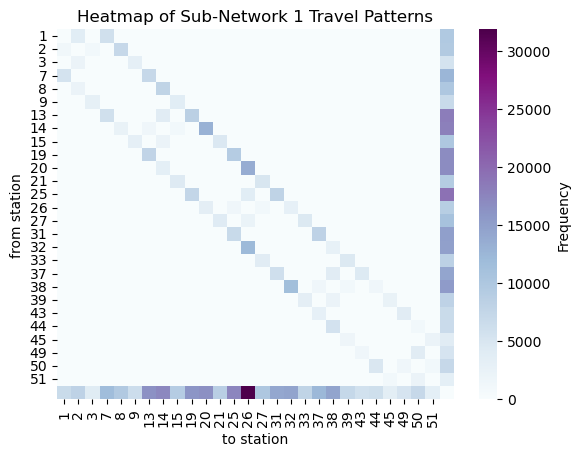

In [8]:
#Heatmap for commuters' travel patterns for every single trip between adjacent stations
hm = np.zeros((28, 28))
travel_pattern_list =  [tpp1, tpn1, tpp6, tpn6]
cluster1 = [1,2,3,7,8,9,13,14,15,19,20,21,25,26,27,31,32,33,37,38,39,43,44,45,49,50,51]
travel_dict1 = {k:v for v, k in enumerate(cluster1)}
from_station1 = {}
to_station1 = {}
for start_station, density in tpp1.items():
    if start_station in cluster1:
        end_station = start_station + 1
        hm[travel_dict1[start_station]][travel_dict1[end_station]] = density
        if start_station in from_station1.keys():
            from_station1[start_station] += density
        else:
            from_station1[start_station] = density
        if end_station in to_station1.keys():
            to_station1[end_station] += density
        else:
            to_station1[end_station] = density
for start_station, density in tpn1.items():
    if start_station in cluster1:
        end_station = start_station - 1
        hm[travel_dict1[start_station]][travel_dict1[end_station]] = density
        if start_station in from_station1.keys():
            from_station1[start_station] += density
        else:
            from_station1[start_station] = density
        if end_station in to_station1.keys():
            to_station1[end_station] += density
        else:
            to_station1[end_station] = density
for start_station, density in tpp6.items():
    if start_station in cluster1:
        end_station = start_station + 6
        hm[travel_dict1[start_station]][travel_dict1[end_station]] = density
        if start_station in from_station1.keys():
            from_station1[start_station] += density
        else:
            from_station1[start_station] = density
        if end_station in to_station1.keys():
            to_station1[end_station] += density
        else:
            to_station1[end_station] = density
for start_station, density in tpn6.items():
    if start_station in cluster1:
        end_station = start_station - 6
        hm[travel_dict1[start_station]][travel_dict1[end_station]] = density
        if start_station in from_station1.keys():
            from_station1[start_station] += density
        else:
            from_station1[start_station] = density
        if end_station in to_station1.keys():
            to_station1[end_station] += density
        else:
            to_station1[end_station] = density
for start_station, density in from_station1.items():
    hm[travel_dict1[start_station]][27] = density
for end_station, density in to_station1.items():
    hm[27][travel_dict1[end_station]] = density
sns.heatmap(hm, 
            xticklabels=cluster1, 
            yticklabels=cluster1, 
            cmap="BuPu",
            cbar_kws={'label': 'Frequency'}
           ).set(title="Heatmap of Sub-Network 1 Travel Patterns", xlabel="to station", ylabel="from station")

# laplacian matrix + network graph

In [9]:
#populate adjacency matrix
unique_stations = np.unique(df.iloc[:,1:20]).astype(int)[:-1] #taking into account NaN
num_stations = len(unique_stations) 
print(np.isnan(df.iloc[:,1:20].values[0][2]))

True


In [10]:
#create adjacency matrix
adj_matrix = np.zeros((num_stations, num_stations), dtype=int)
for commuter in df.iloc[:,1:20].values:
    for j in range(1, len(commuter)):
        if np.isnan(commuter[j]) or np.isnan(commuter[j]):
            break
        else:
            adj_matrix[int(commuter[j - 1] - 1)][int(commuter[j] - 1)] = 1
            adj_matrix[int(commuter[j] - 1)][int(commuter[j - 1] - 1)] = 1

In [11]:
adj = pd.DataFrame(adj_matrix, columns=[i for i in range(1,55)], index=[i for i in range(1,55)])
adj

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
deg_matrix = np.diag(np.sum(adj_matrix, axis=1))
deg_matrix

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 2]])

In [13]:
L = deg_matrix - adj_matrix
L

array([[ 2, -1,  0, ...,  0,  0,  0],
       [-1,  3, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2, -1,  0],
       [ 0,  0,  0, ..., -1,  3, -1],
       [ 0,  0,  0, ...,  0, -1,  2]])

In [14]:
##using eigvalue and eigvector to find clusters
eigValues, eigVectors = np.linalg.eig(L)
eigValues_argsort = np.argsort(eigValues)
eigValues_sorted = np.round(eigValues[eigValues_argsort], 3)
eigVectors_sorted = np.round(eigVectors[:, eigValues_argsort], 3)
print("EigenValues:\n", eigValues_sorted)
print("Eigenvectors:\n", eigVectors_sorted)
    
    #eigenvectors columns corresponding to eigenvalue 0
print("Clusters:\n")
for i in range(len(eigValues)):
    if eigValues_sorted[i] == 0:
        print(f'{i+1}.) Eigenvalue: {eigValues_sorted[i]}\n')
        print(eigVectors_sorted[:, i],"\n")

EigenValues:
 [-0.     0.     0.121  0.121  0.384  0.468  0.468  0.477  0.621  0.644
  0.697  1.     1.     1.     1.     1.056  1.139  1.233  1.468  1.488
  1.523  1.523  1.653  1.653  1.829  1.844  1.923  2.347  2.347  2.515
  2.738  3.     3.     3.242  3.5    3.532  3.532  3.567  3.721  3.879
  3.879  4.095  4.162  4.294  4.312  4.441  4.458  5.141  5.23   5.464
  5.611  5.786  5.897  5.975]
Eigenvectors:
 [[ 0.004 -0.192 -0.029 ... -0.    -0.029 -0.   ]
 [ 0.004 -0.192 -0.029 ...  0.     0.059  0.   ]
 [ 0.004 -0.192 -0.029 ... -0.    -0.029 -0.   ]
 ...
 [-0.192  0.009  0.266 ...  0.113 -0.     0.122]
 [-0.192  0.009  0.266 ... -0.226  0.    -0.243]
 [-0.192  0.009  0.266 ...  0.113 -0.     0.122]]
Clusters:

1.) Eigenvalue: -0.0

[ 0.004  0.004  0.004 -0.192 -0.192 -0.192  0.004  0.004  0.004 -0.192
 -0.192 -0.192  0.004  0.004  0.004 -0.192 -0.192 -0.192  0.004  0.004
  0.004 -0.192 -0.192 -0.192  0.004  0.004  0.004 -0.192 -0.192 -0.192
  0.004  0.004  0.004 -0.192 -0.192 -0.1

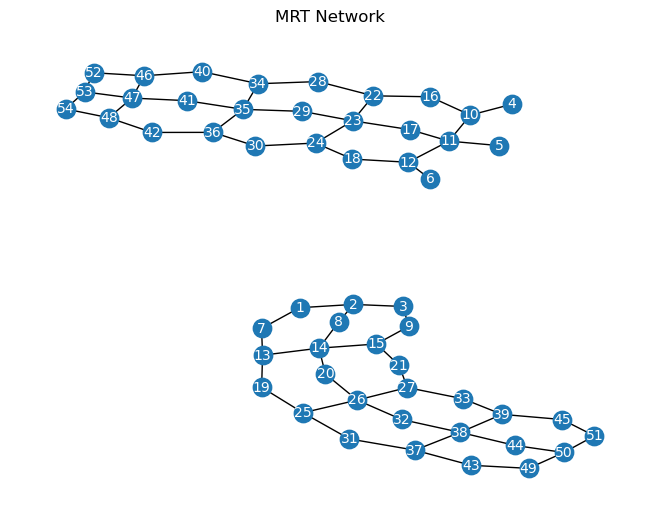

In [15]:
#plot graph
import networkx as nx
np.random.seed(10)
G = nx.from_numpy_matrix(adj_matrix)
mapping = {i: i+1 for i in range(len(G.nodes))}
G = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(G, k = 0.0228)  # layout for the nodes

    
nx.draw(G, pos, with_labels=True, node_size= 175, font_color='white', font_size = 10)  # draw nodes and edges with labels
plt.title("MRT Network")
plt.show()  # show the graph

## Shortest route

In [16]:
#Find shortest path from one station to another using Laplacian graph
def shortest_path(L, start, end):
    no_stations = 0
    Lnx = np.zeros(54)
    Lnx[start - 1] = 1 #vector representing the start station
    while Lnx[end - 1] == 0:
        Lnx = np.dot(Lnx, L) #Increase neighbourhood length by 1 every iteration
        no_stations += 1
        if no_stations > 10: #max number of possible minimum stations for each trip is 10 for each sub-network
            print("These 2 stations are not connected")
            return None
    return no_stations

shortest_path(L,1,45)

9

In [18]:
#Find a possible shortest route from one station to another using adjacency matrix
def path(A, start, end):
    path = [start]
    curr = start
    if shortest_path(L, start, end) == None:
        return None
    start_row, start_col, end_row, end_col = check_coordinates(A, start, end)
    change_row = end_row - start_row
    change_col = end_col - start_col
    try:
        direction_x = int(change_col/np.abs(change_col))
    except:
        direction_x = 1
    try:
        direction_y = int(change_row/np.abs(change_row))
    except:
        direction_y = 1
    if not (A[start-1][start] == 1) | (A[start-1][start-2] == 1):
        curr += direction_y*6
        path.append(curr)
        change_row -= direction_y
        direction_y = -1
    for i in range(direction_x, change_col + direction_x, direction_x):
        curr += direction_x
        path.append(curr)
    for i in range(direction_y, change_row + direction_y, direction_y):
        curr += direction_y*6
        path.append(curr)
    return path

    
def check_coordinates(A, start, end):
    return (start-1)//6, 5 - (6-start)%6, (end-1)//6, 5 - (6-end)%6

path(adj_matrix, 1, 45)

[1, 2, 3, 9, 15, 21, 27, 33, 39, 45]

# Inefficient routes by commuters

In [19]:
#From start to end station, how many people took k number of stations
#(start, end) : {k: n people}
travel_dict = {}
for i in range(len(df)):
    stations = df.iloc[i,1:20][df.iloc[i,1:20].notnull()]
    start = stations[0]
    end = stations[-1]
    length = len(stations) - 1
    occurrence = {}
    if (start,end) in travel_dict.keys():
        if length in travel_dict[(start,end)].keys():
            travel_dict[(start,end)][length] += 1
        else:
            travel_dict[(start,end)][length] = 1
    else:
        travel_dict[(start,end)] = {length:1}
travel_dict

{(37, 31): {1: 78},
 (46, 47.0): {5: 13, 9: 20, 13: 14, 1: 12, 3: 16},
 (36, 6.0): {5: 40},
 (5, 48.0): {8: 38, 10: 7},
 (43, 26.0): {6: 207, 8: 218, 4: 384, 12: 192},
 (46, 10.0): {6: 171},
 (35, 11.0): {4: 48},
 (1, 2.0): {5: 30, 1: 42, 13: 33, 9: 38, 17: 40},
 (4, 29.0): {13: 414, 11: 388, 7: 430, 5: 812},
 (41, 29.0): {2: 526},
 (38, 45.0): {2: 11, 4: 2, 10: 5, 14: 6, 6: 5},
 (11, 30.0): {12: 8, 6: 5, 4: 3, 10: 1},
 (1, 26.0): {5: 1808, 13: 585, 9: 626},
 (24, 5.0): {14: 8, 8: 9, 4: 9, 12: 13},
 (26, 20): {1: 29},
 (13, 15.0): {10: 20, 14: 11, 6: 42, 2: 20},
 (39, 26.0): {11: 203, 3: 404, 7: 387},
 (2, 26.0): {4: 1489},
 (10, 29.0): {6: 411, 12: 385, 10: 414, 4: 817},
 (13, 43.0): {5: 76},
 (14, 3.0): {7: 15, 3: 26, 15: 10, 11: 15},
 (14, 26.0): {2: 962},
 (4, 5.0): {7: 10, 3: 26, 11: 10, 17: 16, 15: 26},
 (25, 32.0): {8: 7, 6: 8, 2: 12, 4: 7, 10: 5},
 (47, 29.0): {3: 984},
 (5, 11): {1: 41},
 (30, 4.0): {14: 10, 12: 8, 6: 4, 8: 4},
 (15, 8.0): {2: 7, 10: 11, 6: 6, 14: 2, 4: 2},
 (

In [20]:
#Overall inefficiency across entire network (people who did not take the shortest route from one station to another)
not_efficient_people = 0
for trip in travel_dict.keys():
    minimum_stations = min(travel_dict[trip])
    for no_stations, k_people in travel_dict[trip].items():
        if no_stations != minimum_stations:
            not_efficient_people += k_people
not_efficient_people

44403

In [21]:
#Travel inefficiency analysis for sub-network 1
ineff1 = {"eff":{}, "ineff":{}}
cluster1 = [1,2,3,7,8,9,13,14,15,19,20,21,25,26,27,31,32,33,37,38,39,43,44,45,49,50,51]
cluster2 = [4,5,6,10,11,12,16,17,18,22,23,24,28,29,30,34,35,36,40,41,42,46,47,48,52,53,54]
for trip, travel in travel_dict.items():
    minimum_stations = min(travel_dict[trip])
    start_station = trip[0]
    if start_station in cluster2:
        continue
    not_efficient_people = 0
    efficient_people = 0
    for no_stations, k_people in travel_dict[trip].items():
        if no_stations != minimum_stations:
            not_efficient_people += k_people
        else:
            efficient_people += k_people
    if start_station in ineff1["eff"].keys():
        ineff1["eff"][start_station] += efficient_people
    else:
        ineff1["eff"][start_station] = efficient_people
    if start_station in ineff1["ineff"].keys():
        ineff1["ineff"][start_station] += not_efficient_people
    else:
        ineff1["ineff"][start_station] = not_efficient_people

ineff1["eff"] = dict(sorted(ineff1["eff"].items()))
ineff1["ineff"] = dict(sorted(ineff1["ineff"].items()))

for start_station in ineff1["eff"].keys():
    total = ineff1["eff"][start_station] + ineff1["ineff"][start_station]
    ineff1["eff"][start_station] = ineff1["eff"][start_station] / total
    ineff1["ineff"][start_station] = ineff1["ineff"][start_station] / total

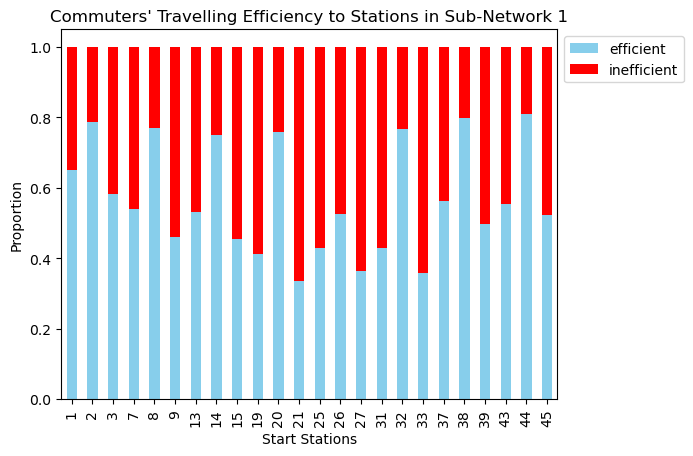

In [22]:
df_ineff1 = pd.DataFrame(ineff1)
df_ineff1.plot(kind="bar", stacked=True, color=['skyblue', 'red'])
plt.legend(labels=["efficient","inefficient"],loc='upper left', bbox_to_anchor=(1,1))

plt.title("Commuters' Travelling Efficiency to Stations in Sub-Network 1")
plt.xlabel("Start Stations")
plt.ylabel("Proportion")
plt.show()

In [23]:
#Check commuters from which stations are the most inefficient in sub-network 1
dict(sorted(ineff1["ineff"].items(), key=lambda x:x[1], reverse=True))

{21: 0.6638297872340425,
 33: 0.6423913043478261,
 27: 0.6360824742268041,
 19: 0.5882352941176471,
 25: 0.5717592592592593,
 31: 0.5706272310045895,
 15: 0.5449409347714432,
 9: 0.5407949790794979,
 39: 0.5020639834881321,
 45: 0.4776931447225245,
 26: 0.4731578947368421,
 13: 0.47024114930733707,
 7: 0.4590078328981723,
 43: 0.4467425025853154,
 37: 0.4371035940803383,
 3: 0.4184027777777778,
 1: 0.3496019383869851,
 14: 0.25,
 20: 0.24148936170212765,
 32: 0.2319127849355798,
 8: 0.2299687825182102,
 2: 0.2130977130977131,
 38: 0.20062370062370063,
 44: 0.19174041297935104}

In [24]:
#Travel inefficiency analysis for sub-network 2
ineff2 = {"eff":{}, "ineff":{}}
cluster1 = [1,2,3,7,8,9,13,14,15,19,20,21,25,26,27,31,32,33,37,38,39,43,44,45,49,50,51]
cluster2 = [4,5,6,10,11,12,16,17,18,22,23,24,28,29,30,34,35,36,40,41,42,46,47,48,52,53,54]
for trip, travel in travel_dict.items():
    minimum_stations = min(travel_dict[trip])
    start_station = trip[0]
    if start_station in cluster1:
        continue
    not_efficient_people = 0
    efficient_people = 0
    for no_stations, k_people in travel_dict[trip].items():
        if no_stations != minimum_stations:
            not_efficient_people += k_people
        else:
            efficient_people += k_people
    if start_station in ineff2["eff"].keys():
        ineff2["eff"][start_station] += efficient_people
    else:
        ineff2["eff"][start_station] = efficient_people
    if start_station in ineff2["ineff"].keys():
        ineff2["ineff"][start_station] += not_efficient_people
    else:
        ineff2["ineff"][start_station] = not_efficient_people

ineff2["eff"] = dict(sorted(ineff2["eff"].items()))
ineff2["ineff"] = dict(sorted(ineff2["ineff"].items()))

for start_station in ineff2["eff"].keys():
    total = ineff2["eff"][start_station] + ineff2["ineff"][start_station]
    ineff2["eff"][start_station] = ineff2["eff"][start_station] / total
    ineff2["ineff"][start_station] = ineff2["ineff"][start_station] / total

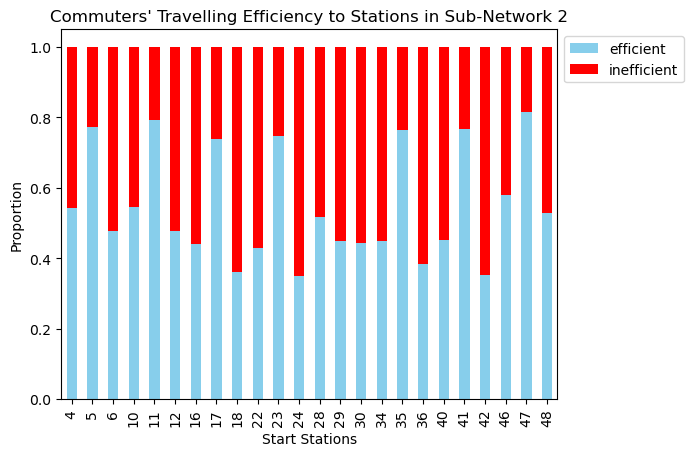

In [25]:
df_ineff2 = pd.DataFrame(ineff2)
df_ineff2.plot(kind="bar", stacked=True, color=['skyblue', 'red'])
plt.legend(labels=["efficient","inefficient"],loc='upper left', bbox_to_anchor=(1,1))

plt.title("Commuters' Travelling Efficiency to Stations in Sub-Network 2")
plt.xlabel("Start Stations")
plt.ylabel("Proportion")
plt.show()

In [26]:
#Check commuters from which stations are the most inefficient in sub-network 1
dict(sorted(ineff2["ineff"].items(), key=lambda x:x[1], reverse=True))

{24: 0.6515716568993074,
 42: 0.6483516483516484,
 18: 0.6399583766909469,
 36: 0.6174099946265449,
 22: 0.5698367452707955,
 16: 0.5600425079702445,
 30: 0.5580221997981837,
 29: 0.5509554140127388,
 34: 0.5499227997941328,
 40: 0.5495,
 12: 0.5239520958083832,
 6: 0.5233887733887734,
 28: 0.4840255591054313,
 48: 0.47093649085037675,
 4: 0.45837537840565085,
 10: 0.45486905669972033,
 46: 0.4212384573601304,
 17: 0.2603938730853392,
 23: 0.2537623248572911,
 35: 0.2368,
 41: 0.23362658846529813,
 5: 0.22837907819782496,
 11: 0.20694941236586611,
 47: 0.18609625668449198}

# Peak hours

In [27]:
#number of commuters at each station at each hour
counts_df = pd.DataFrame()

for column in df.iloc[:,1:20].columns:
    count =  df[column].value_counts().reindex(range(1, num_stations+1), fill_value=0)

    counts_df[column] = count
    
counts_df

,0602hr,0604hr,0606hr,0608hr,0610hr,0612hr,0614hr,0616hr,0618hr,0620hr,0622hr,0624hr,0626hr,0628hr,0630hr,0632hr,0634hr,0636hr,0638hr
1,5778,550,1031,549,1015,824,1107,676,298,176,95,63,69,111,72,27,48,42,46
2,2886,1498,652,1083,920,1162,711,1179,523,95,34,72,35,85,15,37,13,51,0
3,2880,267,605,300,575,426,653,363,247,166,84,51,73,68,73,21,32,32,36
4,3964,150,93,231,120,247,167,254,98,92,58,75,69,41,54,54,39,34,7
5,1931,45,39,75,84,74,126,98,112,19,68,45,56,15,50,48,26,22,0
6,1924,37,30,70,67,88,73,150,88,81,45,65,42,37,37,47,26,23,20
7,1915,5807,560,1128,763,1184,803,314,297,242,118,87,144,92,41,63,51,56,0
8,961,2895,1161,877,960,621,985,455,838,384,106,55,118,26,48,19,68,0,0
9,956,2796,265,593,405,711,427,243,204,205,102,88,87,94,29,41,43,45,0
10,3933,4498,1173,718,1186,694,1231,320,250,133,159,131,92,107,108,80,61,23,0


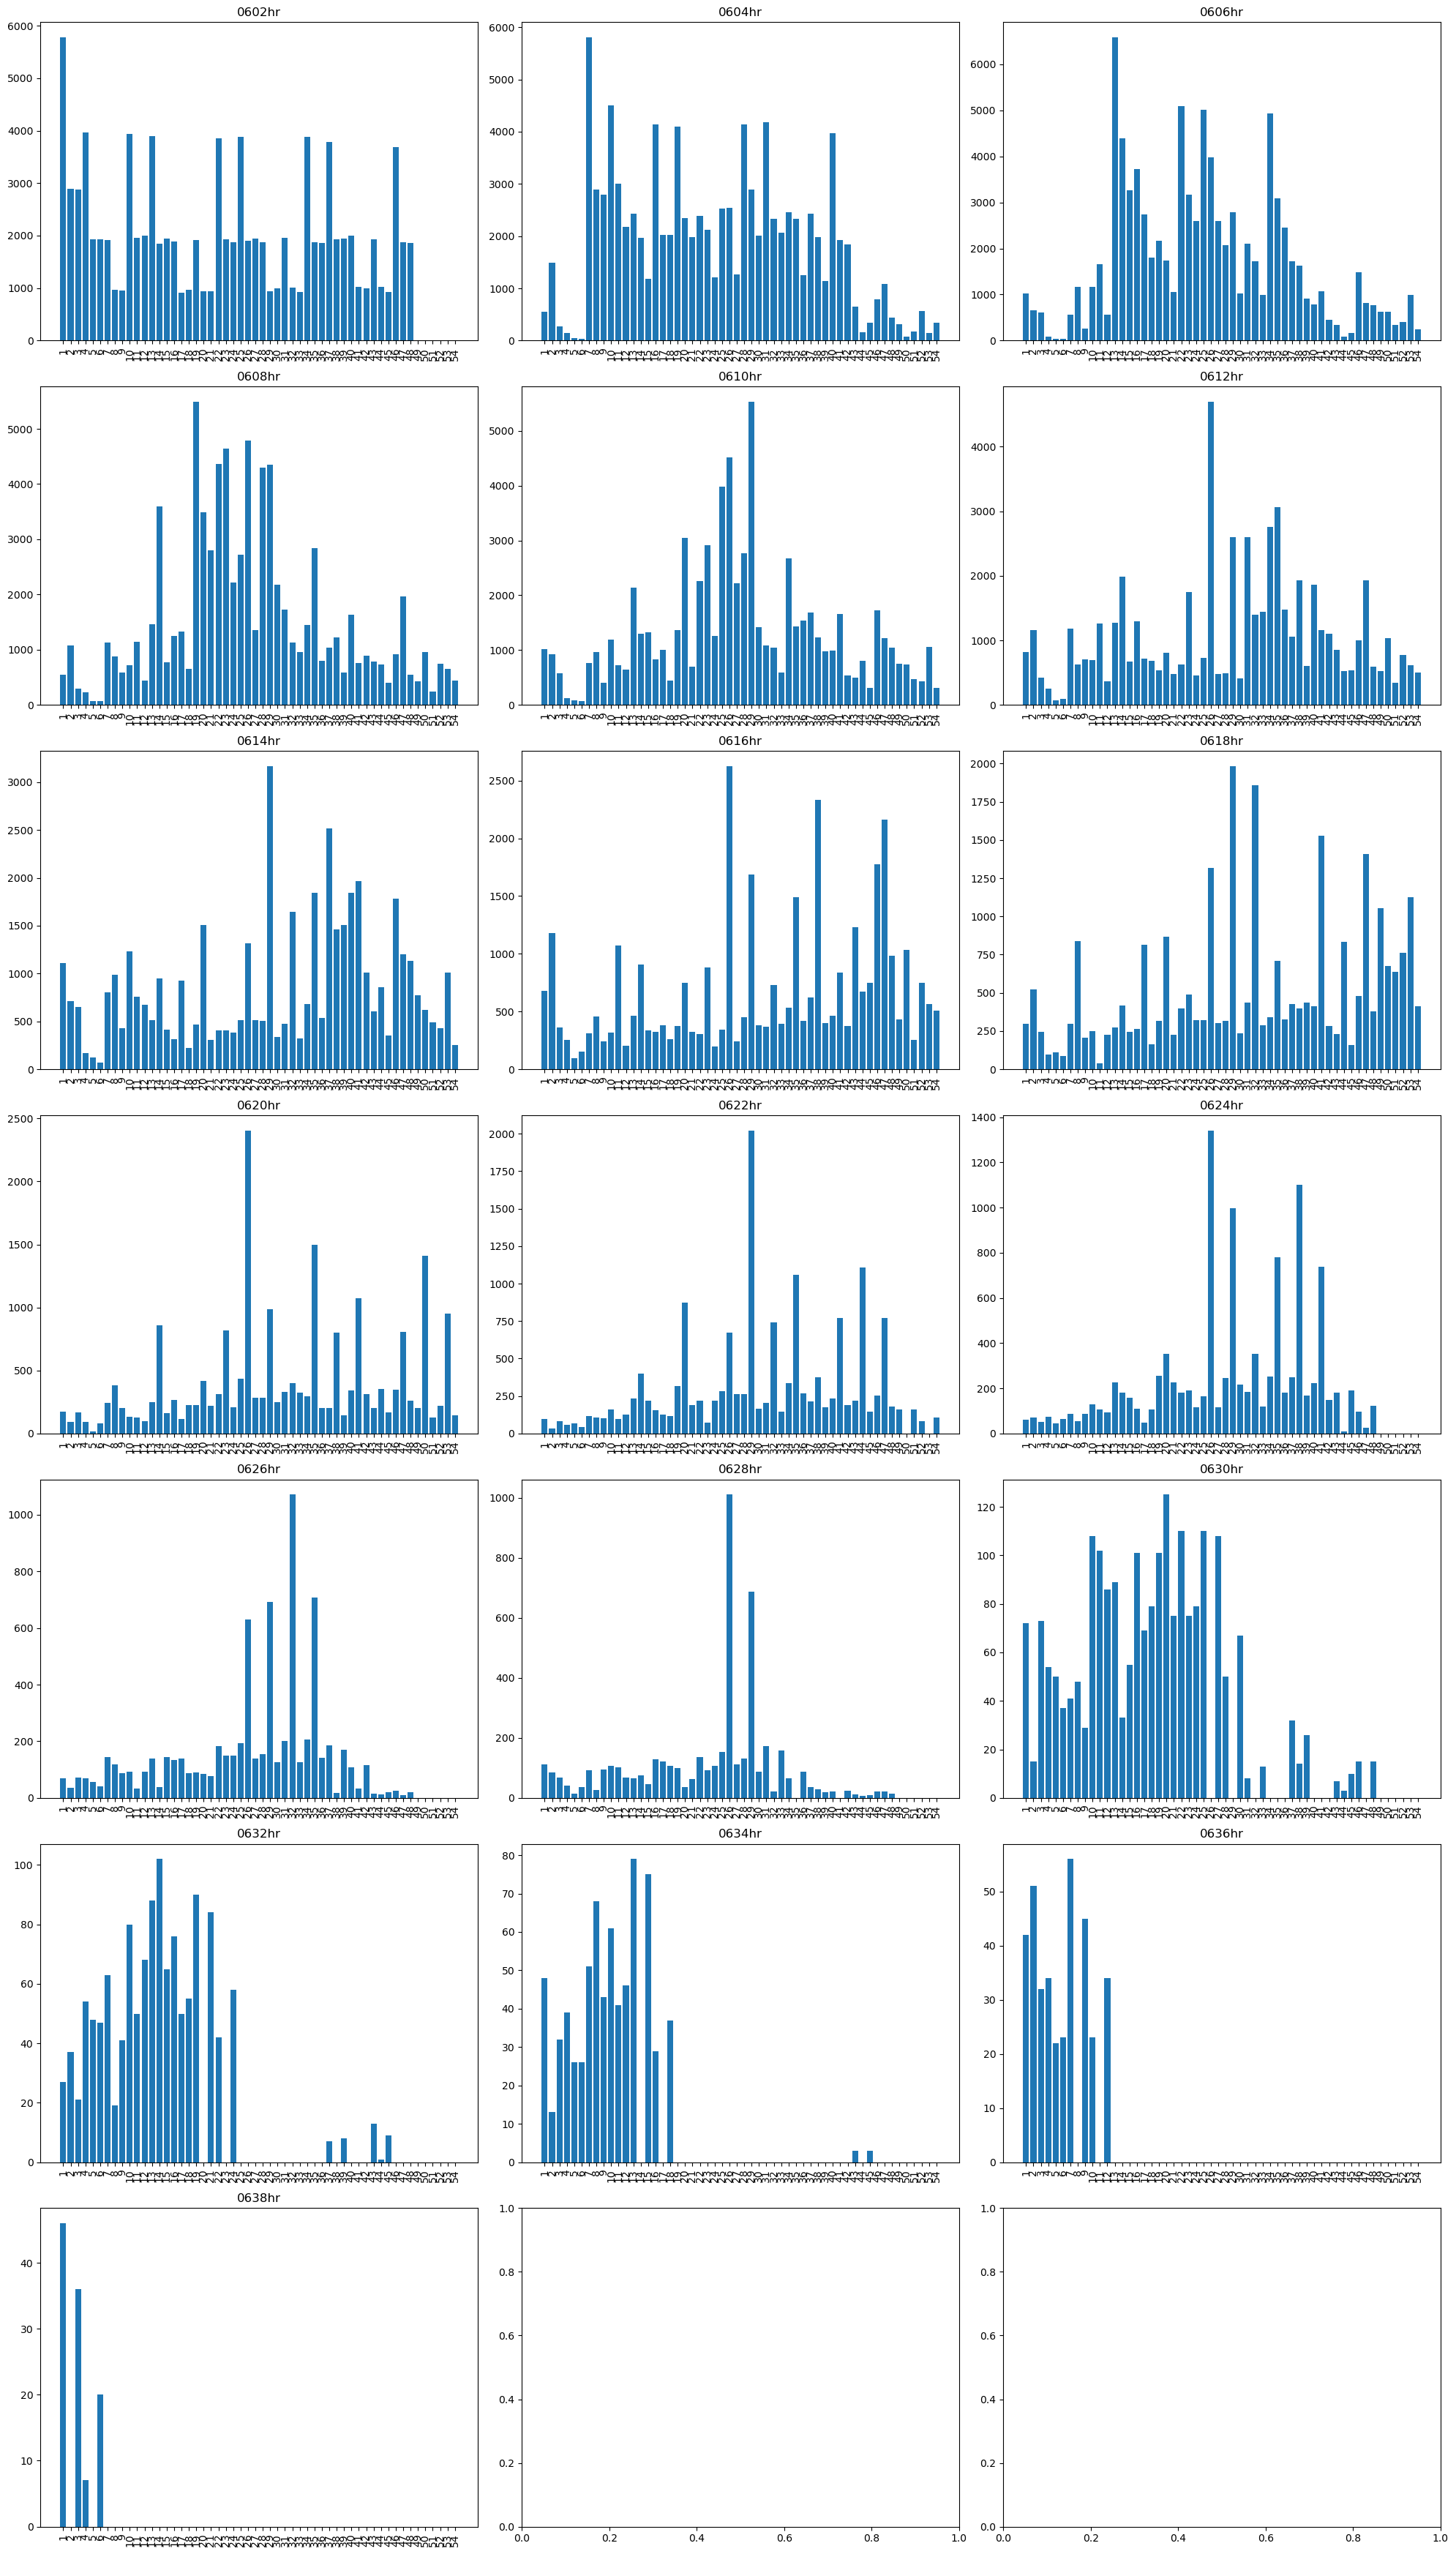

In [28]:
num_cols = 3
num_rows = 7

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*5))

for i, col in enumerate(counts_df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].bar(counts_df.index, counts_df[col])
    axs[row_idx, col_idx].set_title(col)
    axs[row_idx, col_idx].set_xticks(counts_df.index)
    axs[row_idx, col_idx].set_xticklabels(counts_df.index, rotation=90)
    

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Utility of Stations in Sub-Network 1')]

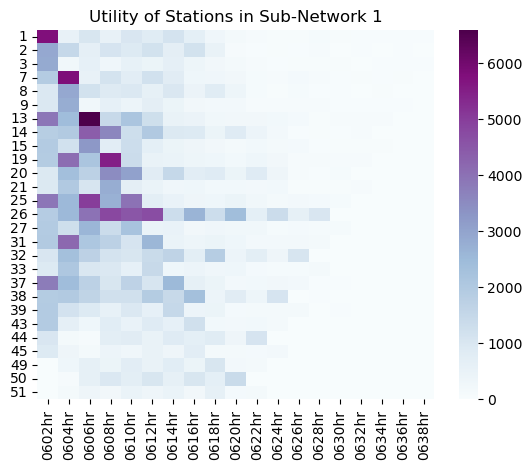

In [29]:
#utility of stations in sub-network 1 across the time frame
counts1_df = pd.DataFrame()
cluster1 = [1,2,3,7,8,9,13,14,15,19,20,21,25,26,27,31,32,33,37,38,39,43,44,45,49,50,51]

for column in df.iloc[:,1:20].columns:
    count =  df[df["Cluster"]==1][column].value_counts().reindex(cluster1, fill_value=0)
    counts1_df[column] = count

sns.heatmap(counts1_df,cmap="BuPu", yticklabels=cluster1).set(title="Utility of Stations in Sub-Network 1")

[Text(0.5, 1.0, 'Utility of Stations in Sub-Network 2')]

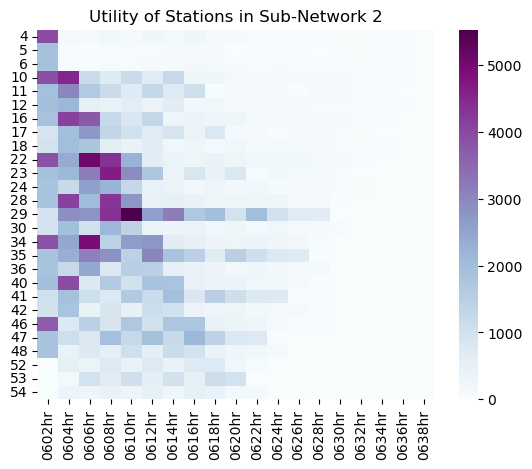

In [30]:
#utility of stations in sub-network 2 across the time frame
counts2_df = pd.DataFrame()
cluster2 = [4,5,6,10,11,12,16,17,18,22,23,24,28,29,30,34,35,36,40,41,42,46,47,48,52,53,54]

for column in df.iloc[:,1:20].columns:
    count =  df[df["Cluster"]==2][column].value_counts().reindex(cluster2, fill_value=0)
    counts2_df[column] = count

sns.heatmap(counts2_df,cmap="BuPu", yticklabels=cluster2).set(title="Utility of Stations in Sub-Network 2")

# Trip journey (start to end station)

[Text(0.5, 1.0, "Commuters' Trips"),
 Text(0.5, 23.52222222222222, 'end station'),
 Text(50.722222222222214, 0.5, 'start station')]

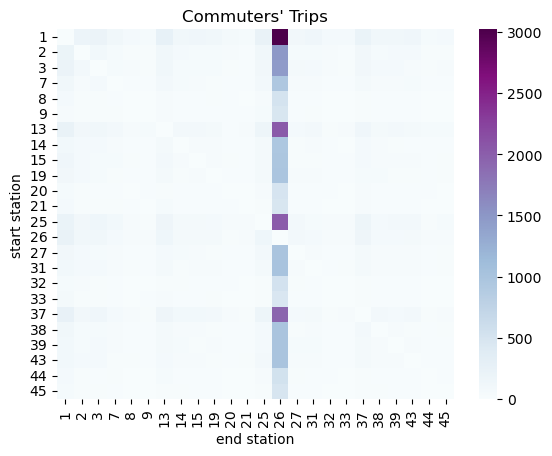

In [31]:
#Commuters' start and end stations for sub-network 1
tp = dict(df[df["Cluster"]==1].groupby(["0602hr","end_station"]).size())
ticks = [1,2,3,7,8,9,13,14,15,19,20,21,25,26,27,31,32,33,37,38,39,43,44,45]
hm = np.zeros((24, 24))
index = 0
for i in range(24):
    for j in range(24):
        if i == j:
            hm[i][j] = 0
        else:
            hm[i][j] = list(tp.values())[index]
            index+=1
sns.heatmap(hm, xticklabels=ticks, 
            yticklabels=ticks, 
            cmap="BuPu"
           ).set(title="Commuters' Trips", xlabel = "end station", ylabel="start station")

[Text(0.5, 1.0, "Commuters' Trips"),
 Text(0.5, 23.52222222222222, 'end station'),
 Text(50.722222222222214, 0.5, 'start station')]

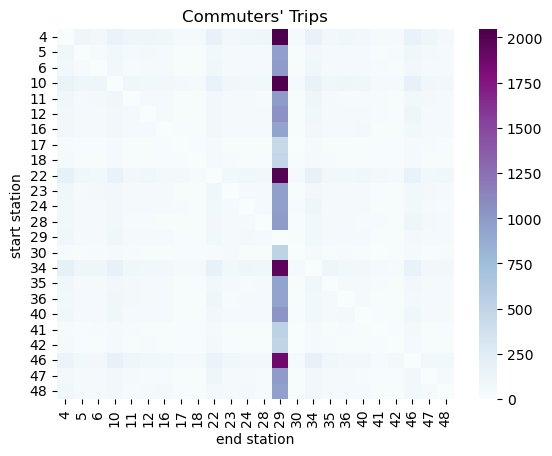

In [32]:
#Commuters' start and end stations for sub-network 2
a = dict(df[df["Cluster"]==2].groupby(["0602hr","end_station"]).size())
ticks = [4,5,6,10,11,12,16,17,18,22,23,24,28,29,30,34,35,36,40,41,42,46,47,48]
hm = np.zeros((24, 24))
index = 0
for i in range(24):
    for j in range(24):
        if i == j:
            hm[i][j] = 0
        else:
            hm[i][j] = list(a.values())[index]
            index+=1
sns.heatmap(hm, xticklabels=ticks, 
            yticklabels=ticks, 
            cmap="BuPu"
           ).set(title="Commuters' Trips", xlabel = "end station", ylabel="start station")

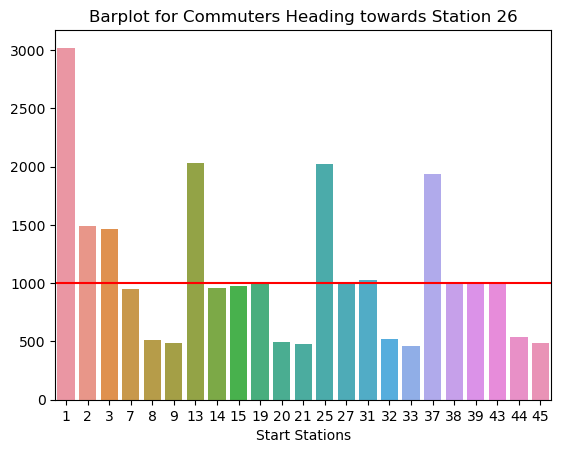

In [33]:
#focus on stations 26 and 29, identify where commuters start from

#Analysis of commuters travelling towards station 26 in sub-network 1
going_to_s26 = df[df["end_station"].isin([26])].groupby(["0602hr"]).size()
sorted_going_to_s26 = sorted(dict(going_to_s26).items(), key=lambda x:x[0])
bp1 = sns.barplot(x = [s[0] for s in sorted_going_to_s26], y=[s[1] for s in sorted_going_to_s26])
bp1.set(title="Barplot for Commuters Heading towards Station 26", xlabel="Start Stations")
bp1.axhline(1000, color="red")

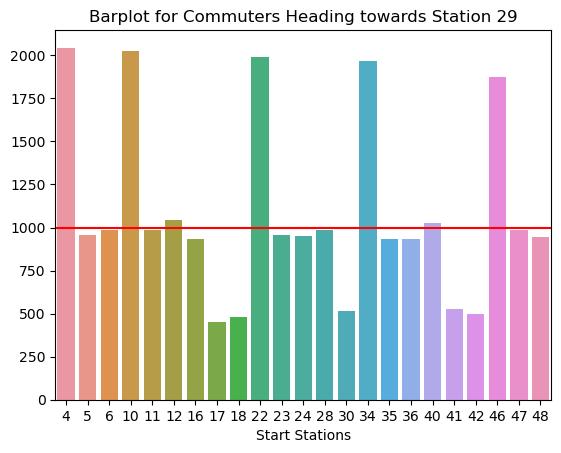

In [34]:
#Analysis of commuters travelling towards station 26 in sub-network 1
going_to_s29 = df[df["end_station"].isin([29])].groupby(["0602hr"]).size()
sorted_going_to_s29 = sorted(dict(going_to_s29).items(), key=lambda x:x[0])
bp2 = sns.barplot(x = [s[0] for s in sorted_going_to_s29], y=[s[1] for s in sorted_going_to_s29])
bp2.set(title="Barplot for Commuters Heading towards Station 29", xlabel="Start Stations")
bp2.axhline(1000, color="red")

# Occupation

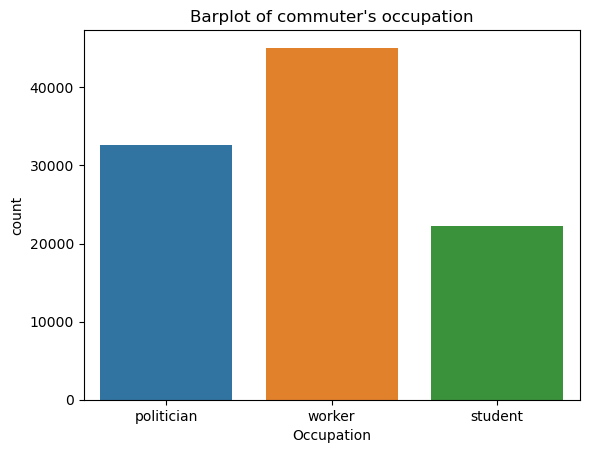

In [35]:
#barplot of commuter's occupation
sns.countplot(x ='Occupation', data = df)
plt.title("Barplot of commuter's occupation")
plt.show()

# Destination (focus onstations 26 and 29)

In [60]:
#Alight from station 26
alight_26 = df[df["end_station"] == 26]
alight_26.iloc[:,1:20].apply(pd.value_counts)

,0602hr,0604hr,0606hr,0608hr,0610hr,0612hr,0614hr,0616hr,0618hr,0620hr,0622hr,0624hr,0626hr,0628hr,0630hr,0632hr,0634hr,0636hr,0638hr
1.0,3019.0,176.0,397.0,203,421,209.0,403.0,192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1489.0,870.0,281.0,586,298,631.0,301.0,606.0,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,1460.0,105.0,189.0,95,210,92.0,203.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,949.0,2824.0,203.0,421,209,403.0,192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,508.0,1489.0,870.0,281,586,298.0,631.0,301.0,606.0,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,483.0,1371.0,95.0,210,92,203.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13.0,2032.0,1172.0,3221.0,418,796,410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14.0,962.0,1102.0,2052.0,2367,581,1172.0,607.0,631.0,301.0,606.0,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15.0,977.0,563.0,1593.0,183,396,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.0,990.0,2024.0,1004.0,2588,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

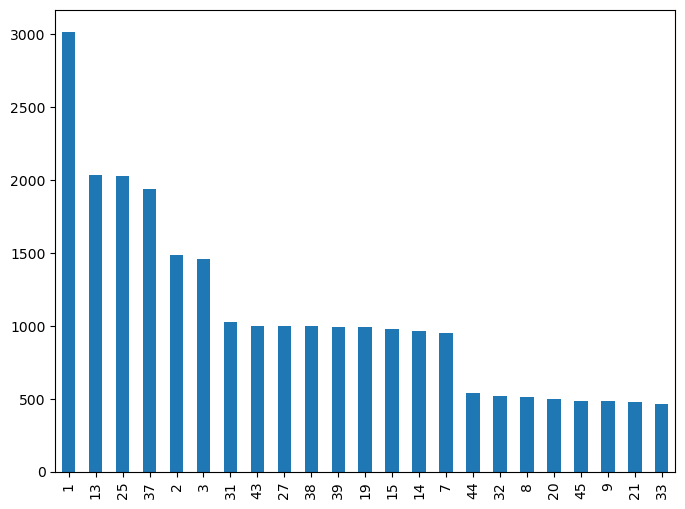

In [72]:
alight_26['0602hr'].value_counts().plot(kind='bar', figsize=(8, 6))
#alight at station 26 mostly start from 1,13,25,37

In [67]:
alight_29 = df[df["end_station"] == 29]
alight_29['0602hr'].value_counts()

4     2044
10    2027
22    1989
34    1968
46    1875
12    1041
40    1028
28     985
6      985
47     984
11     983
5      959
23     958
24     952
48     947
16     936
36     934
35     932
41     526
30     513
42     500
18     480
17     450
Name: 0602hr, dtype: int64

<AxesSubplot:>

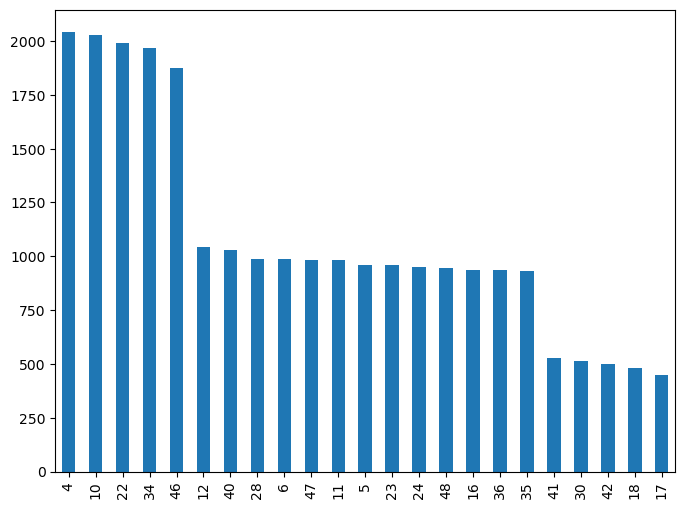

In [68]:
alight_29['0602hr'].value_counts().plot(kind='bar', figsize=(8, 6))
#alight at station 29 mostly start from 4,10,22,34,46

# Destination vs Occupation

<AxesSubplot:>

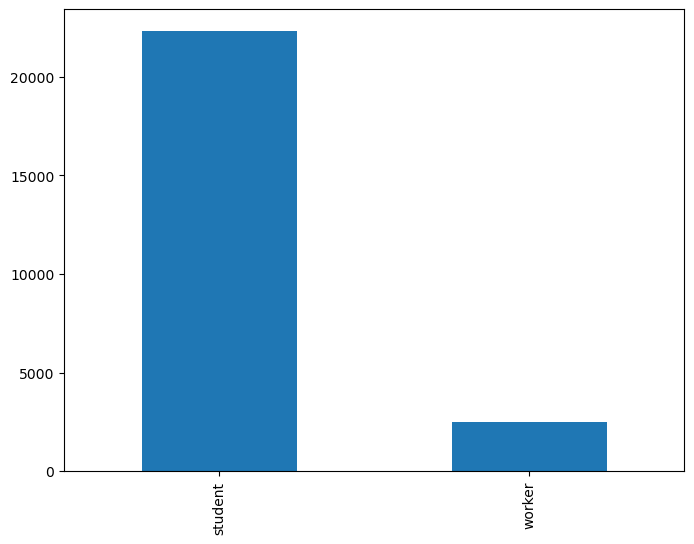

In [62]:
alight_26['Occupation'].value_counts().plot(kind='bar', figsize=(8, 6))

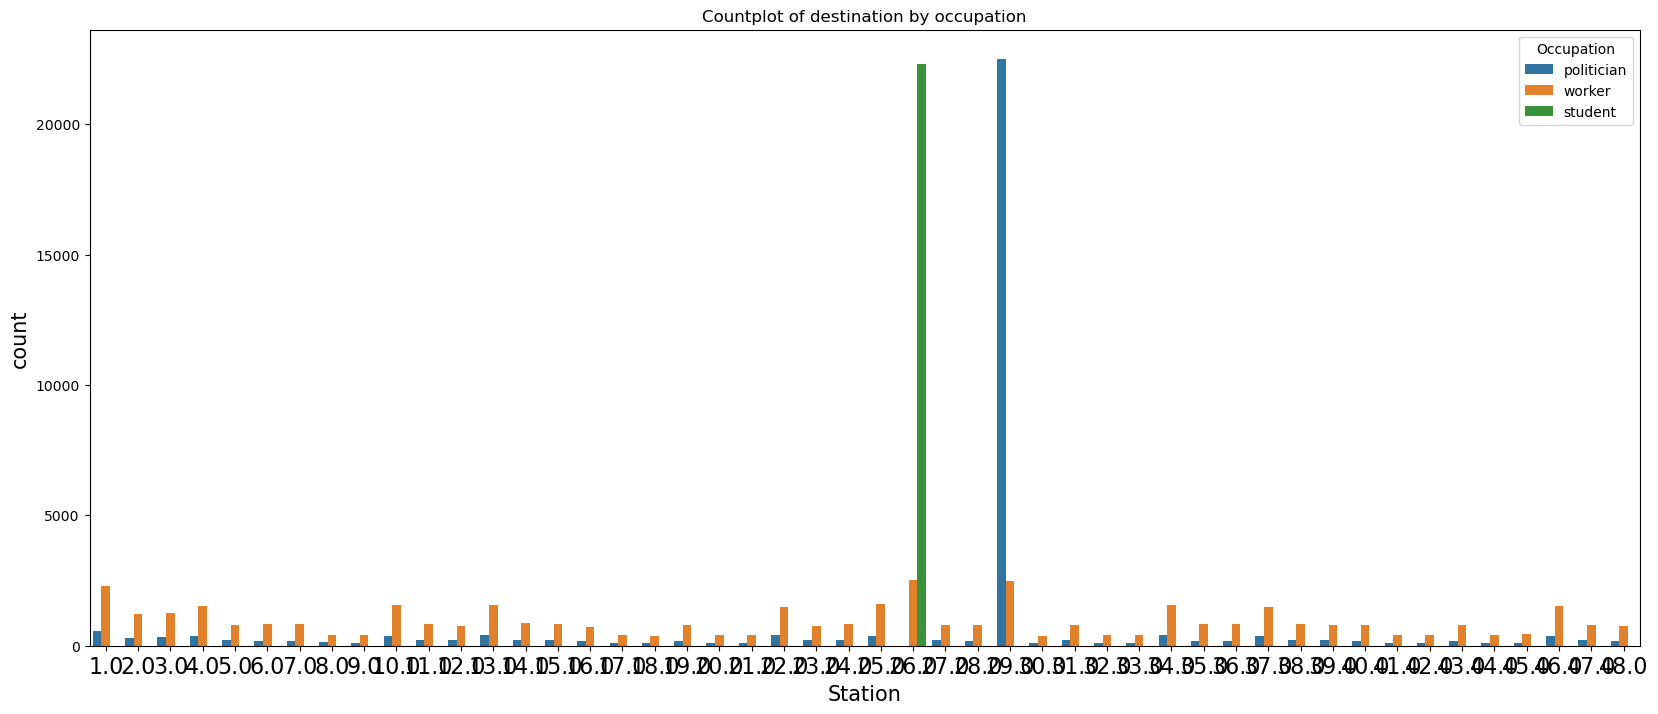

In [39]:
plt.figure(figsize=(20, 8))
sns.countplot(data =df, x = 'end_station', hue='Occupation')
plt.ylabel("count",fontsize=15)
plt.xlabel("Station",fontsize=15)
plt.xticks(fontsize=16)
plt.title("Countplot of destination by occupation")
plt.show()

# Gender

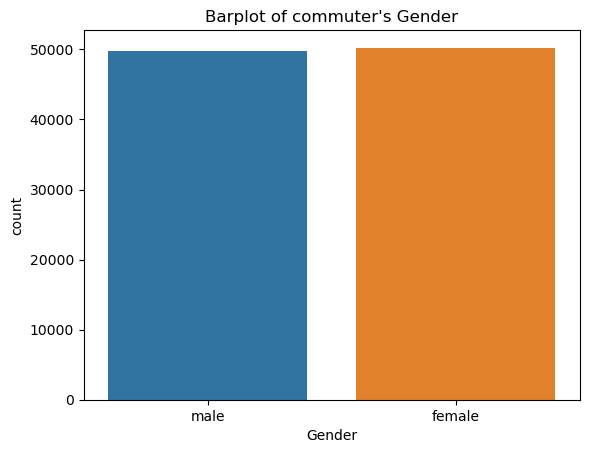

In [40]:
#barplot of commuter's gender
sns.countplot(x ='Gender', data = df)
plt.title("Barplot of commuter's Gender")
plt.show()

##almost equal

In [41]:
df_female = df[df['Gender'] == 'female']
df_male = df[df['Gender'] == 'male']


In [43]:
df[(df["Gender"]== "female")].groupby("end_station").size()

end_station
1.0      1402
2.0       764
3.0       812
4.0       950
5.0       506
6.0       503
7.0       506
8.0       257
9.0       258
10.0      969
11.0      473
12.0      501
13.0      966
14.0      520
15.0      532
16.0      454
17.0      278
18.0      221
19.0      506
20.0      265
21.0      246
22.0      945
23.0      476
24.0      532
25.0     1054
26.0    12572
27.0      517
28.0      517
29.0    12582
30.0      240
31.0      505
32.0      281
33.0      251
34.0      979
35.0      494
36.0      484
37.0      906
38.0      519
39.0      498
40.0      495
41.0      264
42.0      254
43.0      469
44.0      239
45.0      291
46.0      967
47.0      517
48.0      508
dtype: int64

In [44]:
df[(df["Gender"]== "male")].groupby("end_station").size()

end_station
1.0      1435
2.0       758
3.0       778
4.0       933
5.0       496
6.0       523
7.0       532
8.0       298
9.0       236
10.0      957
11.0      564
12.0      488
13.0     1007
14.0      558
15.0      523
16.0      445
17.0      247
18.0      250
19.0      481
20.0      261
21.0      252
22.0      949
23.0      499
24.0      504
25.0      930
26.0    12250
27.0      501
28.0      485
29.0    12414
30.0      245
31.0      511
32.0      247
33.0      257
34.0      963
35.0      498
36.0      533
37.0      948
38.0      505
39.0      521
40.0      484
41.0      251
42.0      254
43.0      525
44.0      259
45.0      291
46.0      924
47.0      529
48.0      456
dtype: int64

# Destination vs Gender

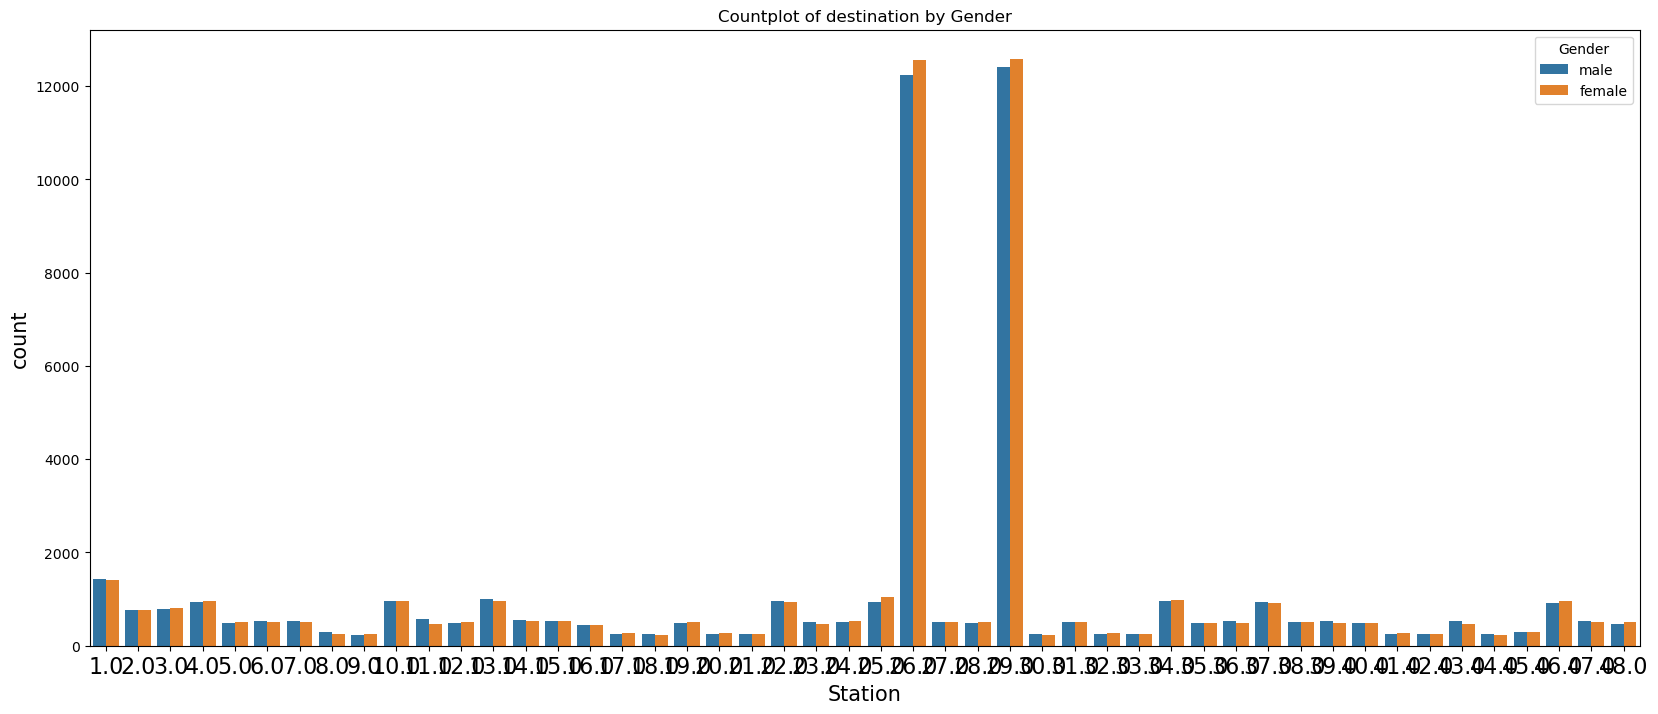

In [45]:
plt.figure(figsize=(20, 8))
sns.countplot(data =df, x = 'end_station', hue='Gender')
plt.ylabel("count",fontsize=15)
plt.xlabel("Station",fontsize=15)
plt.xticks(fontsize=16)
plt.title("Countplot of destination by Gender")
plt.show()

# Occupation

## Worker

In [55]:
df_worker = df[df['Occupation'] == 'worker']
df_worker_end = sorted(dict(df_worker.groupby("end_station").size()).items(), key=lambda x:x[1], reverse = True)
df_worker_end

[(26.0, 2516),
 (29.0, 2492),
 (1.0, 2274),
 (25.0, 1595),
 (13.0, 1579),
 (10.0, 1561),
 (34.0, 1549),
 (4.0, 1519),
 (46.0, 1513),
 (22.0, 1496),
 (37.0, 1493),
 (3.0, 1253),
 (2.0, 1221),
 (14.0, 855),
 (15.0, 840),
 (7.0, 839),
 (24.0, 832),
 (6.0, 830),
 (11.0, 822),
 (36.0, 821),
 (35.0, 819),
 (38.0, 815),
 (47.0, 812),
 (31.0, 809),
 (39.0, 807),
 (28.0, 803),
 (19.0, 802),
 (27.0, 798),
 (43.0, 798),
 (5.0, 795),
 (40.0, 782),
 (48.0, 769),
 (12.0, 766),
 (23.0, 763),
 (16.0, 714),
 (45.0, 463),
 (8.0, 428),
 (20.0, 426),
 (17.0, 421),
 (33.0, 418),
 (32.0, 409),
 (41.0, 409),
 (42.0, 404),
 (44.0, 404),
 (9.0, 398),
 (21.0, 393),
 (30.0, 389),
 (18.0, 365)]

## Student

In [57]:
df_student = df[df['Occupation'] == 'student']
df_student_end = sorted(dict(df_student.groupby("end_station").size()).items(), key=lambda x:x[1], reverse = True)
df_student_end

[(26.0, 22306)]

In [64]:
## stations where students board
df_student.iloc[:,1:20].apply(lambda x: x[x.notnull()].iloc[0], axis=1).value_counts()

1.0     2740
25.0    1827
13.0    1814
37.0    1731
2.0     1320
3.0     1293
31.0     923
27.0     905
43.0     901
39.0     900
19.0     887
38.0     886
15.0     878
14.0     871
7.0      862
44.0     488
32.0     464
8.0      449
20.0     448
45.0     442
9.0      432
21.0     428
33.0     417
dtype: int64

## Politician

In [69]:
df_politician = df[df['Occupation'] == 'politician']
df_politician_end = sorted(dict(df_politician.groupby("end_station").size()).items(), key=lambda x:x[1], reverse = True)
df_politician_end

[(29.0, 22504),
 (1.0, 563),
 (22.0, 398),
 (13.0, 394),
 (34.0, 393),
 (25.0, 389),
 (46.0, 378),
 (10.0, 365),
 (4.0, 364),
 (37.0, 361),
 (3.0, 337),
 (2.0, 301),
 (47.0, 234),
 (12.0, 223),
 (14.0, 223),
 (27.0, 220),
 (11.0, 215),
 (15.0, 215),
 (23.0, 212),
 (39.0, 212),
 (38.0, 209),
 (5.0, 207),
 (31.0, 207),
 (24.0, 204),
 (7.0, 199),
 (28.0, 199),
 (40.0, 197),
 (6.0, 196),
 (36.0, 196),
 (43.0, 196),
 (48.0, 195),
 (16.0, 185),
 (19.0, 185),
 (35.0, 173),
 (8.0, 127),
 (32.0, 119),
 (45.0, 119),
 (18.0, 106),
 (41.0, 106),
 (21.0, 105),
 (17.0, 104),
 (42.0, 104),
 (20.0, 100),
 (9.0, 96),
 (30.0, 96),
 (44.0, 94),
 (33.0, 90)]

In [70]:
## stations where politicians board
df_politician.iloc[:,1:20].apply(lambda x: x[x.notnull()].iloc[0], axis=1).value_counts()

4.0     2224
10.0    2208
22.0    2181
34.0    2104
46.0    2056
12.0    1125
40.0    1106
6.0     1101
11.0    1100
23.0    1070
47.0    1067
24.0    1063
5.0     1061
28.0    1061
16.0    1044
48.0    1035
35.0    1028
36.0    1022
1.0      573
30.0     571
42.0     554
41.0     546
18.0     529
17.0     497
13.0     403
25.0     375
26.0     374
37.0     351
2.0      295
3.0      260
7.0      205
43.0     203
39.0     202
29.0     201
15.0     200
27.0     187
19.0     185
31.0     181
38.0     176
14.0     173
8.0      109
20.0      94
21.0      92
44.0      92
9.0       88
33.0      86
32.0      86
45.0      71
dtype: int64

# revamp mrt system(does not work)

In [71]:
graph = nx.DiGraph()
for i in range(1,55):
    graph.add_node(i)

graph.add_edges_from(list(board_alight.value_counts().index))
print(graph.edges)

NameError: name 'board_alight' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50)) # Adjust the size of the figure here
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, ax=ax)
nx.draw_networkx_edges(graph, pos, ax=ax)
nx.draw_networkx_labels(graph, pos, ax=ax)

# Show the plot
plt.show()